<a href="https://colab.research.google.com/github/atiq065-ai/Quantium-virtual-internship-/blob/main/Quantium_virtual_internship_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

TRANSACTION DATASET

In [2]:
df = pd.read_csv("/content/QVI_purchase_behaviour.csv")
transaction_data = pd.read_excel("/content/QVI_transaction_data (3).xlsx")

In [3]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


CUSTOMER DATASET

In [4]:
customer_data = pd.read_csv("/content/QVI_purchase_behaviour.csv")
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


MERGE DATASETS

In [5]:
df = pd.merge(transaction_data, customer_data, on="LYLTY_CARD_NBR", how="left")
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


EXPLORATORY DATA ANALYSIS

In [6]:
df = df.rename(columns={"LYLTY_CARD_NBR" : "Card No.",
                        "LIFESTAGE" : "Group",
                        "DATE" : "Date",
                        "PREMIUM_CUSTOMER" : "Subscription",
                        "STORE_NBR" : "Store Id",
                        "TXN_ID" : "Transaction Id",
                        "PROD_NBR" : "Product Id",
                        "PROD_NAME" : "Product",
                        "PROD_QTY" : "Quantity",
                        "TOT_SALES" : "Sales",
                        })
df.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


EXAMINE DATATYPES

In [7]:
df.dtypes

,0
Date,int64
Store Id,int64
Card No.,int64
Transaction Id,int64
Product Id,int64
Product,object
Quantity,int64
Sales,float64
Group,object
Subscription,object


CONVERT DATA DATATYPE FROM (int to Date)

In [8]:
date_offsets = df["Date"].to_list()
base_date = pd.Timestamp("1899-12-30") # Start Date
df["Date"] = [base_date + pd.DateOffset(date_offset) for date_offset in date_offsets]
df["Date"][0:15]

,Date
0,2018-10-17
1,2019-05-14
2,2019-05-20
3,2018-08-17
4,2018-08-18
5,2019-05-19
6,2019-05-16
7,2019-05-16
8,2018-08-20
9,2018-08-18


PRODUCTS SUMMARY

In [9]:
df["Product"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

TEXT ANALYSIS ON PRODUCTS

In [10]:
split_prods = df["Product"].str.replace(r"([0-9]+[gG])", "").str.replace(r"[^\w]", " ").str.split()
split_prods

,Product
0,"[Natural, Chip, Compny, SeaSalt175g]"
1,"[CCs, Nacho, Cheese, 175g]"
2,"[Smiths, Crinkle, Cut, Chips, Chicken, 170g]"
3,"[Smiths, Chip, Thinly, S/Cream&Onion, 175g]"
4,"[Kettle, Tortilla, ChpsHny&Jlpno, Chili, 150g]"
...,...
264831,"[Kettle, Sweet, Chilli, And, Sour, Cream, 175g]"
264832,"[Tostitos, Splash, Of, Lime, 175g]"
264833,"[Doritos, Mexicana, 170g]"
264834,"[Doritos, Corn, Chip, Mexican, Jalapeno, 150g]"


FREQUENCY OF PRODUCTS

In [11]:
word_counts = {}
def count_words(line) :
    for word in line :
        if word not in word_counts :
            word_counts[word] = 1
        else :
            word_counts[word] += 1
split_prods.apply(lambda line : count_words(line))
print(pd.Series(word_counts).sort_values(ascending=False))

175g        60561
Chips       49770
150g        41633
Kettle      41288
&           35565
            ...  
Sunbites     1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Length: 220, dtype: int64


REMOVE SALSA PRODUCTS

In [12]:
df = df[~df["Product"].str.contains(r"[Ss]alsa")]
df.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


CHECK NULL & OUTLIERS

In [13]:
df.describe()

,Date,Store Id,Card No.,Transaction Id,Product Id,Quantity,Sales
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


VIEW OUTLIER CUSTOMER



In [14]:
df.sort_values(by = "Quantity", ascending = False).head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5,RETIREES,Budget
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips 160g,5,9.5,OLDER FAMILIES,Premium
69502,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5,OLDER FAMILIES,Premium


SEE IF Card No. 226000 HAS OTHER TRANSACTIONS

In [15]:
len(df[df["Card No."] == 226000])

2

IT LOOKS LIKE THIS CUSTOMER HAS ONLY HAD THE TWO TRANSACTIONS OVER THE YEAR AND IS NOT AN ORDINARY RETAIL CUSTOMER. THE CUSTOMER MIGHT BE BUYING CHIPS FOR COMMERCIAL PURPOSES INSTEAD. WE WILL REMOVE THIS LOYALTY CARD NUMBER FROM FURTHER ANALYSIS.

In [16]:
df = df[df["Quantity"] < 6]
df.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


COUNT THE NUMBER OF TRANSACTIONS BY DATE

In [17]:
trans_by_date = df["Date"].value_counts()
trans_by_date

,count
Date,
2018-12-24,865
2018-12-23,853
2018-12-22,840
2018-12-19,839
2018-12-20,808
...,...
2019-06-24,612
2018-10-18,611
2018-11-25,610


INSTEAD OF 365, THE DATE COLUMN ONLY HAS 364 UNIQUE VALUES. 1 IS MISSING.

In [18]:
pd.date_range(start=df["Date"].min(), end=df["Date"].max()).difference(df["Date"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

INSERT MISSING VALUE

In [20]:
merge_value = pd.merge(pd.Series(pd.date_range(start=df["Date"].min(), end=df["Date"].max()), name="Date"), df, on="Date", how="left")
merge_value.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription
0,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn FriedChicken 134g,2.0,7.4,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese 175g,2.0,4.2,MIDAGE SINGLES/COUPLES,Budget
3,2018-07-01,58.0,58351.0,54374.0,102.0,Kettle Mozzarella Basil & Pesto 175g,2.0,10.8,MIDAGE SINGLES/COUPLES,Budget
4,2018-07-01,68.0,68193.0,65598.0,44.0,Thins Chips Light& Tangy 175g,2.0,6.6,MIDAGE SINGLES/COUPLES,Budget


ALL TIME SALES GRAPH

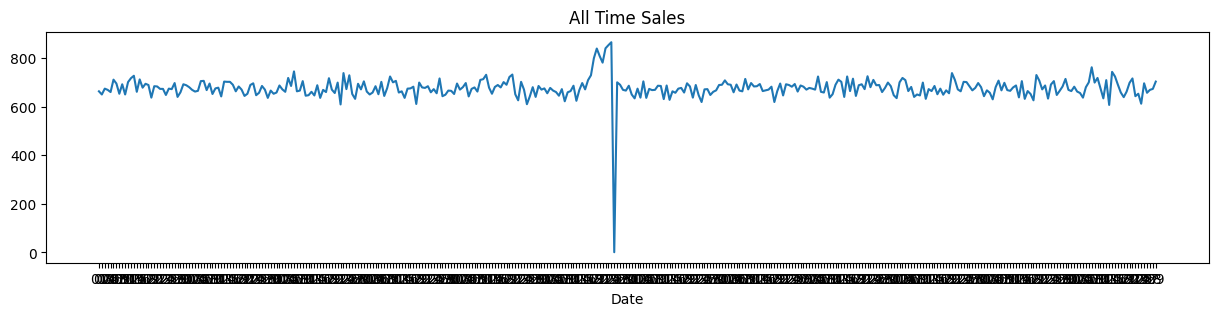

In [21]:
trans_by_date = merge_value["Date"].value_counts()
all_time = trans_by_date[(trans_by_date.index >= pd.Timestamp(2018,7,1)) & (trans_by_date.index < pd.Timestamp(2019,6,30))].sort_index()
all_time.index = all_time.index.strftime('%d')
ax = all_time.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(all_time)))
ax.set_xticklabels(all_time.index)
plt.title("All Time Sales")
plt.savefig("All Time Sales.png", bbox_inches="tight")
plt.show()

DECEMBER SALES GRAPH

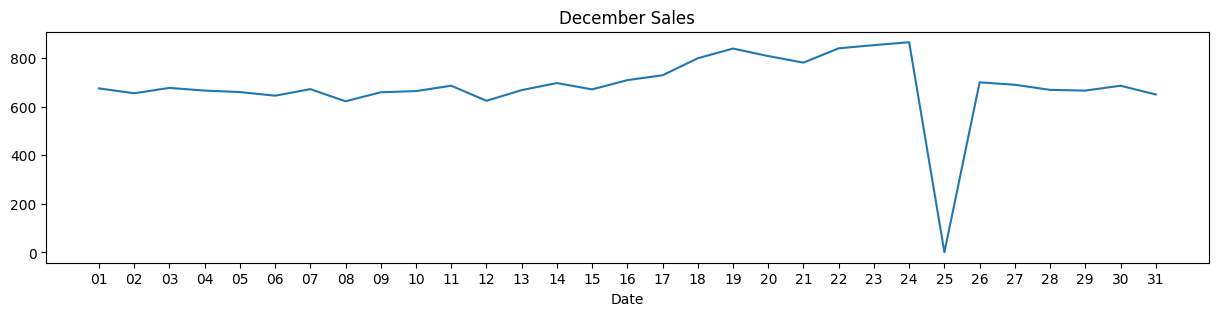

In [22]:
trans_by_date = merge_value["Date"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.Timestamp(2018,12,1)) & (trans_by_date.index < pd.Timestamp(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("December Sales")
plt.savefig("December Sales.png", bbox_inches="tight")
plt.show()

EXPLORE PRODUCT PACK SIZE

In [24]:
# Ensure no spaces between the number and "g"/"G" in the regex
df["Product"] = df["Product"].str.replace(r"(\d+)\s*[gG]", r"\1g", regex=True)
# Extract the numeric part before "g" or "G" and convert to float
pack_size = df["Product"].str.extract(r"(\d+)[gG]")[0].astype(float)
print(pack_size)

0         175.0
1         175.0
2         170.0
3         175.0
4         150.0
          ...  
264831    175.0
264832    175.0
264833    170.0
264834    150.0
264835    175.0
Name: 0, Length: 246740, dtype: float64


SUMMARY OF PACK SIZE

In [25]:
pack_size.describe()

,0
count,246740.000000
mean,175.583521
std,59.432118
min,70.000000
25%,150.000000
50%,170.000000
75%,175.000000
max,380.000000


HISTOGRAM SHOWING TRANSACTION FREQUENCY OF PACK SIZE

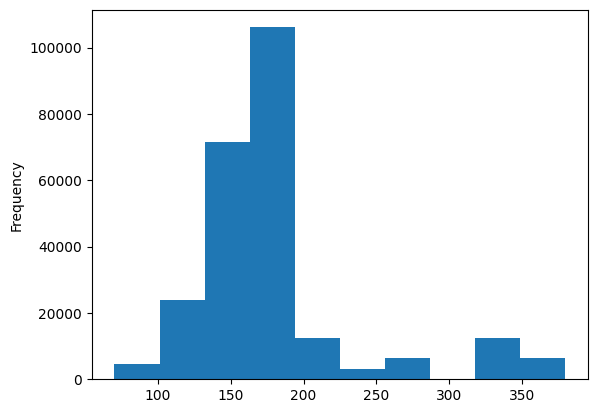

In [26]:
pack_size.plot.hist()
plt.show()

FREQUENCY OF PRODUCT BRAND NAMES

In [27]:
df["Product"].str.split().str[0].value_counts()

,count
Product,
Kettle,41288
Smiths,27390
Pringles,25102
Doritos,22041
Thins,14075
RRD,11894
Infuzions,11057
WW,10320
Cobs,9693


INCLUDE BRAND NAME COLUMN

In [28]:
df["Brand"] = df["Product"].str.split().str[0]
df.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle


COMBINE SAME BRANDS

In [29]:
def clear_brand_names(line) :
    brand = line["Brand"]
    if brand == "Dorito" :
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain" :
        return "Grain Waves"
    elif brand == "Infzns" :
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC" :
        return "Natural Chip Co"
    elif brand == "Red" :
        return "RRD"
    elif brand == "Smith" :
        return "Smiths"
    elif brand == "Snbts" :
        return "Sunbites"
    elif brand == "WW" :
        return "Woolworths"
    else :
        return brand

CLEANED TRANSACTIONAL DATA

In [30]:
df["Brand"] = df.apply(lambda line : clear_brand_names(line), axis=1)
df.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle


HISTOGRAM OF BRAND FREQUENCY

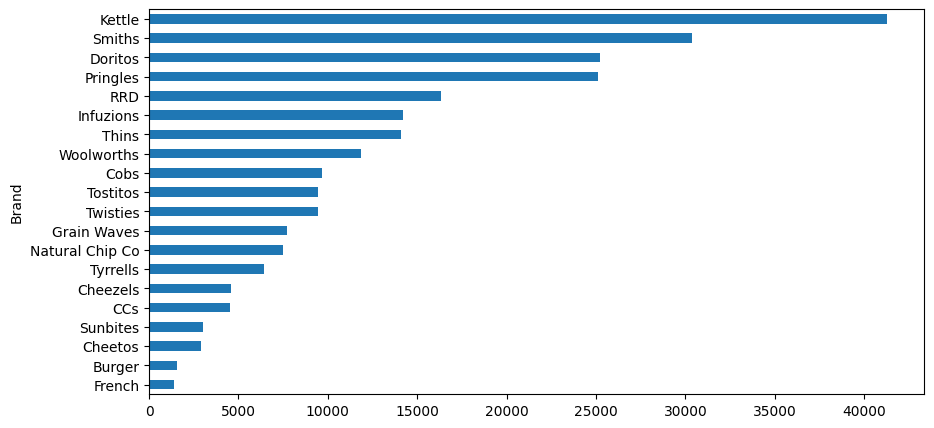

In [31]:
df["Brand"].value_counts(ascending=True).plot.barh(figsize = (10, 5))
plt.show()

DATA ANALYSIS

---> WHO SPENDS THE MOST ON CHIPS (TOTAL SALES), DESCRIBING CUSTOMERS BY LIFESTAGE AND HOW PREMIUM THEIR GENERAL PURCHASING BEHAVIOUR IS ---> HOW MANY CUSTOMERS ARE IN EACH SEGMENT ---> HOW MANY CHIPS ARE BOUGHT PER CUSTOMER BY SEGMENT ---> WHAT IS THE AVERAGE CHIPS PRICE BY CUSTOMER SEGMENT

In [32]:
# 1/ WHO SPENDS THE MOST ON CHIPS (TOTAL SALES), DESCRIBING CUSTOMERS BY LIFESTAGE AND HOW PREMIUM THEIR GENERAL PURCHASING BEHAVIOUR IS
most_shopping = df.groupby(["Group", "Subscription"])["Sales"].agg(["sum"]).sort_values(ascending=False, by="sum")
most_shopping

sum
Group                  Subscription           
OLDER FAMILIES         Budget        156863.75
YOUNG SINGLES/COUPLES  Mainstream    147582.20
RETIREES               Mainstream    145168.95
YOUNG FAMILIES         Budget        129717.95
OLDER SINGLES/COUPLES  Budget        127833.60
                       Mainstream    124648.50
                       Premium       123537.55
RETIREES               Budget        105916.30
OLDER FAMILIES         Mainstream     96413.55
RETIREES               Premium        91296.65
YOUNG FAMILIES         Mainstream     86338.25
MIDAGE SINGLES/COUPLES Mainstream     84734.25
YOUNG FAMILIES         Premium        78571.70
OLDER FAMILIES         Premium        75242.60
YOUNG SINGLES/COUPLES  Budget         57122.10
MIDAGE SINGLES/COUPLES Premium        54443.85
YOUNG SINGLES/COUPLES  Premium        39052.30
MIDAGE SINGLES/COUPLES Budget         33345.70
NEW FAMILIES           Budget         20607.45
                       Mainstream     15979.70
                       Premium        10760.80


HISTOGRAM OF CUSTOMER SEGMENTS CONTRIBUTE TO CHIPS SALES

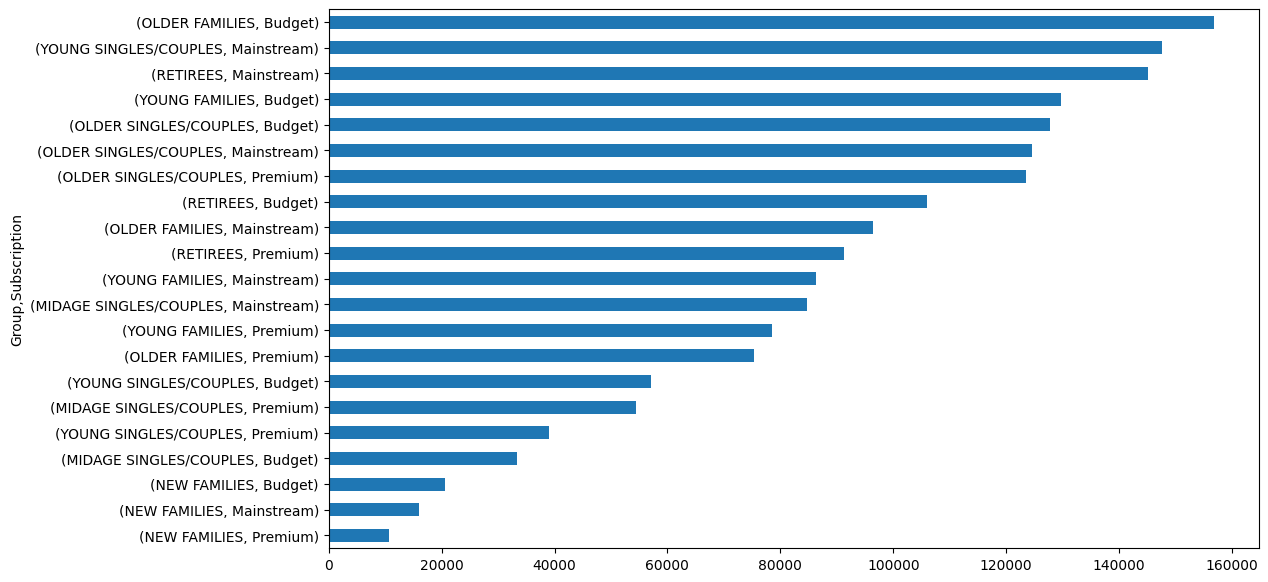

In [34]:
most_shopping["sum"].sort_values().plot.barh(figsize = (12, 7))
plt.show()

TOP SHOPPING PER GROUP BY SUBSCRITION

In [35]:
stage_agg_prem = df.groupby("Group")["Subscription"].agg(pd.Series.mode).sort_values()
print("Top contributor per Group by Subscription")
print(stage_agg_prem)

Top contributor per Group by Subscription
Group
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: Subscription, dtype: object


In [36]:
# 2/ HOW MANY CUSTOMERS ARE IN EACH SEGMENT
cust_seg = df.groupby(["Group", "Subscription"])["Card No."].nunique().sort_values(ascending=False)
pd.DataFrame(cust_seg)

Card No.
Group                  Subscription          
YOUNG SINGLES/COUPLES  Mainstream        7917
RETIREES               Mainstream        6358
OLDER SINGLES/COUPLES  Mainstream        4858
                       Budget            4849
                       Premium           4682
OLDER FAMILIES         Budget            4611
RETIREES               Budget            4385
YOUNG FAMILIES         Budget            3953
RETIREES               Premium           3812
YOUNG SINGLES/COUPLES  Budget            3647
MIDAGE SINGLES/COUPLES Mainstream        3298
OLDER FAMILIES         Mainstream        2788
YOUNG FAMILIES         Mainstream        2685
YOUNG SINGLES/COUPLES  Premium           2480
YOUNG FAMILIES         Premium           2398
MIDAGE SINGLES/COUPLES Premium           2369
OLDER FAMILIES         Premium           2231
MIDAGE SINGLES/COUPLES Budget            1474
NEW FAMILIES           Budget            1087
                       Mainstream         830
                       Premium            575

HISTOGRAM OF CUSTOMER SEGMENTS FREQUENCY

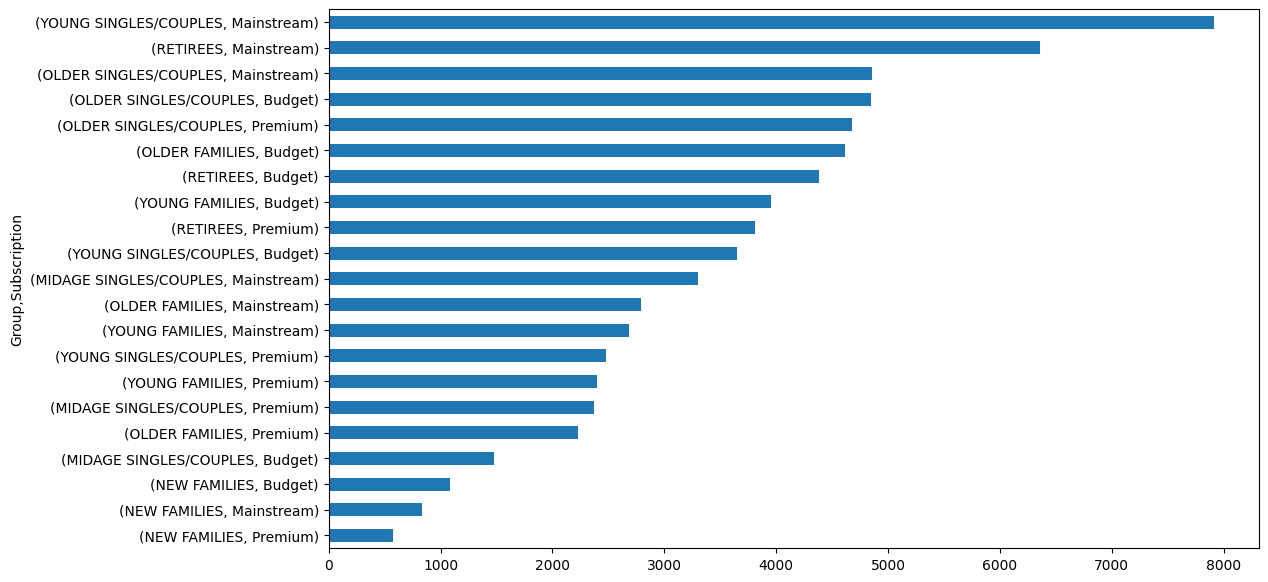

In [37]:
cust_seg.sort_values().plot.barh(figsize = (12, 7))
plt.show()

YOUNG SINGLES/COUPLES (Mainstream) HAS THE HIGHEST POPULATION, FOLLOWED BY RETIREES (Mainstream). WHICH EXPLAIN THEIR HIGH TOTAL SALES.

In [38]:
# 3/ HOW MANY CHIPS ARE BOUGHT PER CUSTOMER BY SEGMENT
# INDIVIDUAL CUSTOMER CHIPS SHOPPING BY DATE
chips_shop_per_segment = df.groupby(["Card No.", "Group", "Subscription"]).count()["Date"]
chips_shop_per_segment.to_frame()

,,,Date
Card No.,Group,Subscription,
1000,YOUNG SINGLES/COUPLES,Premium,1
1002,YOUNG SINGLES/COUPLES,Mainstream,1
1003,YOUNG FAMILIES,Budget,2
1004,OLDER SINGLES/COUPLES,Mainstream,1
1005,MIDAGE SINGLES/COUPLES,Mainstream,1
...,...,...,...
2370651,MIDAGE SINGLES/COUPLES,Mainstream,1
2370701,YOUNG FAMILIES,Mainstream,1
2370751,YOUNG FAMILIES,Premium,1


In [39]:
# CHIPS SHOPPING FROM GROUPS BY INDIVIDUAL (AVG)
segment_shop_chips = chips_shop_per_segment.groupby(["Group", "Subscription"]).agg(["mean"]).sort_values(ascending=False, by="mean")
segment_shop_chips

mean
Group                  Subscription          
OLDER FAMILIES         Mainstream    4.749283
                       Budget        4.665799
                       Premium       4.662931
YOUNG FAMILIES         Premium       4.497081
                       Budget        4.493549
                       Mainstream    4.449534
OLDER SINGLES/COUPLES  Budget        3.541349
                       Premium       3.536950
                       Mainstream    3.511939
MIDAGE SINGLES/COUPLES Mainstream    3.364160
RETIREES               Budget        3.244014
MIDAGE SINGLES/COUPLES Premium       3.213170
RETIREES               Premium       3.209864
MIDAGE SINGLES/COUPLES Budget        3.182497
RETIREES               Mainstream    3.140925
NEW FAMILIES           Mainstream    2.632530
                       Budget        2.597976
                       Premium       2.587826
YOUNG SINGLES/COUPLES  Mainstream    2.468612
                       Premium       2.359677
                       Budget        2.350699

HISTOGRAM OF CHIPS SHOPPING BY SEGMENT

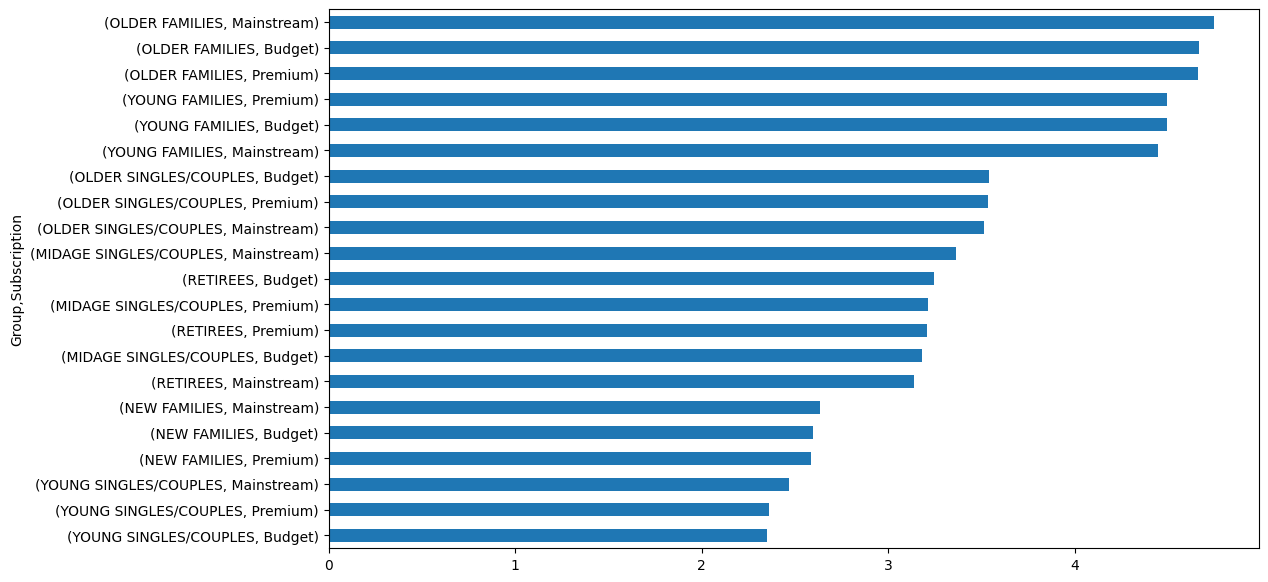

In [40]:
segment_shop_chips["mean"].sort_values().plot.barh(figsize = (12, 7))
plt.show()

1/ DESPITE OLDER FAMILIES NOT HAVING THE HIGHEST POPULATION, THEY HAVE THE HIGHEST FREQUENCY OF PURCHASE, WHICH CONTRIBUTES TO THEIR HIGH TOTAL SALES. 2/ OLDER FAMILIES FOLLOWED BY YOUNG FAMILIES HAS THE HIGHEST AVERAGE QUANTITY OF CHIPS BOUGHT PER PURCHASE.

In [41]:
# 4/ WHAT IS THE AVERAGE CHIPS PRICE BY CUSTOMER SEGMENT

avg_chips_price_cust_segment = df.groupby(["Group", "Subscription"])["Sales"].agg(["mean"]).sort_values(ascending=False, by="mean")
avg_chips_price_cust_segment

,,mean
Group,Subscription,
MIDAGE SINGLES/COUPLES,Mainstream,7.637156
YOUNG SINGLES/COUPLES,Mainstream,7.551279
RETIREES,Premium,7.461315
OLDER SINGLES/COUPLES,Premium,7.459997
RETIREES,Budget,7.445786
OLDER SINGLES/COUPLES,Budget,7.444305
NEW FAMILIES,Mainstream,7.313364
OLDER SINGLES/COUPLES,Mainstream,7.306049
YOUNG FAMILIES,Budget,7.302705


HISTOGRAM OF AVERAGE CHIPS PRICE BY CUSTOMER SEGMENT

<Axes: ylabel='Group,Subscription'>

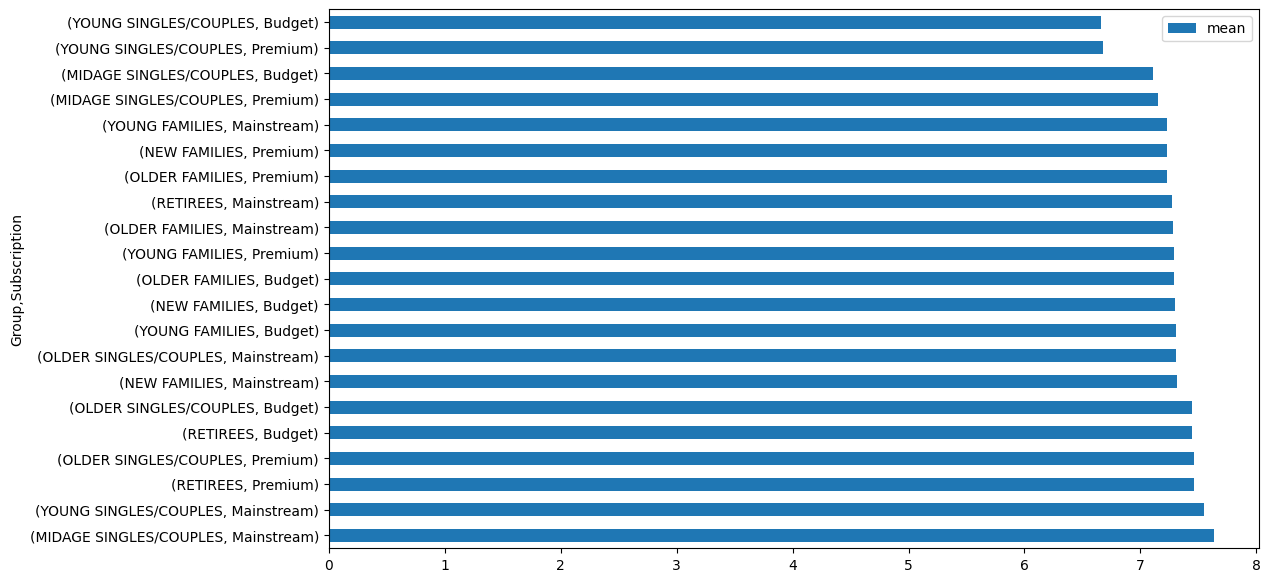

In [42]:
avg_chips_price_cust_segment.plot.barh(figsize = (12, 7))

THE Mainstream CATEGORY OF THE "YOUNG & MIDAGE SINGLES/COUPLES" HAVE THE HIGHEST SPENDING OF CHIPS PER PURCHASE. AND THE DIFFERENCE TO THE non-Mainstream "YOUNG & MIDAGE SINGLES/COUPLES" ARE STATISTICALLY SIGNIFICANT.

T-TEST

THE DIFFERENCE BETWEEN Mainstream & non-Mainstream GROUP MIGHT SEEM INSIGNIFICANT (7.6 Vs 6.6), BUT WE WILL FIND OUT BY EXAMINING IF THE DIFFERENCE IS STATISTICALLY SIGNIFICANT.

In [43]:
mainstream = df["Subscription"] == "Mainstream"
budget_premium = (df["Subscription"] == "Budget") | (df["Subscription"] == "Premium")
young_midage = (df["Group"] == "YOUNG SINGLES/COUPLES") | (df["Group"] == "MIDAGE SINGLES/COUPLES")

a = df[young_midage & mainstream]["Sales"]
b = df[young_midage & budget_premium]["Sales"]

stat, pval = ttest_ind(a.values, b.values, equal_var=False)
print(pval)
pval < 0.0000001

1.834645908180742e-237


True

P-VALUE IS CLOSE TO 0. THERE IS A STATISTICALLY SIGNIFICANT DIFFERENCE TO THE TOTAL SALES BETWEEN THE "Mainstream YOUNG MIDAGE" SEGMENT TO THE "Budget & Premium YOUNG MIDAGE" SEGMENT.

EXAMINE WHAT BRAND OF CHIPS THE TOP 3 SEGMENTS CONTRIBUTING TO TOTAL SALES ARE BUYING.

In [44]:
df.groupby(["Group", "Subscription"])["Brand"].agg(pd.Series.mode).sort_values().to_frame()

Brand
Group                  Subscription        
MIDAGE SINGLES/COUPLES Budget        Kettle
YOUNG SINGLES/COUPLES  Budget        Kettle
YOUNG FAMILIES         Premium       Kettle
                       Mainstream    Kettle
                       Budget        Kettle
RETIREES               Premium       Kettle
                       Mainstream    Kettle
                       Budget        Kettle
OLDER SINGLES/COUPLES  Premium       Kettle
YOUNG SINGLES/COUPLES  Mainstream    Kettle
OLDER SINGLES/COUPLES  Mainstream    Kettle
OLDER FAMILIES         Premium       Kettle
                       Mainstream    Kettle
                       Budget        Kettle
NEW FAMILIES           Premium       Kettle
                       Mainstream    Kettle
                       Budget        Kettle
MIDAGE SINGLES/COUPLES Premium       Kettle
                       Mainstream    Kettle
OLDER SINGLES/COUPLES  Budget        Kettle
YOUNG SINGLES/COUPLES  Premium       Kettle

CHIPS BRAND "Kettle" IS DOMINATING EVERY SEGMENT AS THE MOST PURCHASED BRAND .

========== YOUNG SINGLES/COUPLES - Premium ==========
Brand
Kettle      838
Smiths      787
Pringles    537
Name: count, dtype: int64


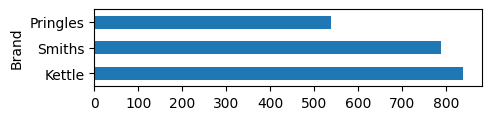

========== YOUNG SINGLES/COUPLES - Budget ==========
Brand
Kettle      1211
Smiths      1185
Pringles     832
Name: count, dtype: int64


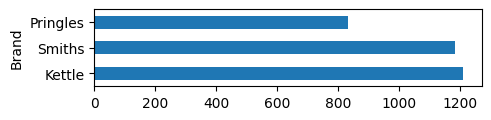

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Brand
Kettle      3844
Doritos     2379
Pringles    2315
Name: count, dtype: int64


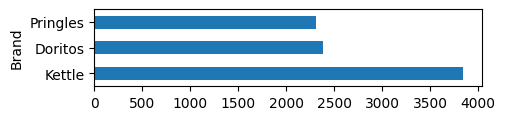

========== MIDAGE SINGLES/COUPLES - Premium ==========
Brand
Kettle      1206
Smiths       923
Pringles     781
Name: count, dtype: int64


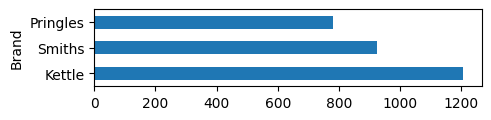

========== MIDAGE SINGLES/COUPLES - Budget ==========
Brand
Kettle     713
Smiths     591
Doritos    479
Name: count, dtype: int64


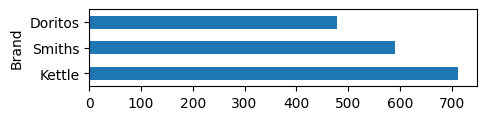

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Brand
Kettle     2136
Smiths     1276
Doritos    1210
Name: count, dtype: int64


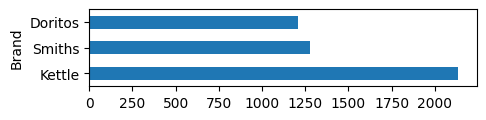

========== NEW FAMILIES - Premium ==========
Brand
Kettle      247
Pringles    165
Smiths      155
Name: count, dtype: int64


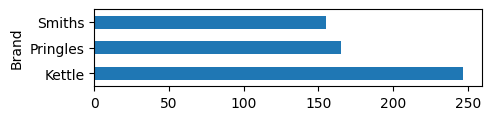

========== NEW FAMILIES - Budget ==========
Brand
Kettle     510
Smiths     328
Doritos    315
Name: count, dtype: int64


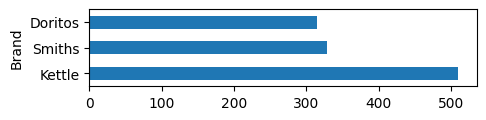

========== NEW FAMILIES - Mainstream ==========
Brand
Kettle     414
Doritos    257
Smiths     244
Name: count, dtype: int64


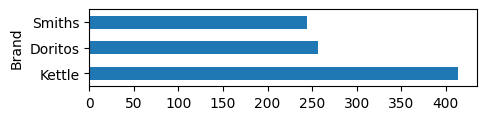

========== OLDER FAMILIES - Premium ==========
Brand
Kettle      1512
Smiths      1448
Pringles    1014
Name: count, dtype: int64


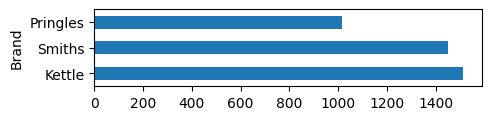

========== OLDER FAMILIES - Budget ==========
Brand
Kettle     3320
Smiths     2948
Doritos    2032
Name: count, dtype: int64


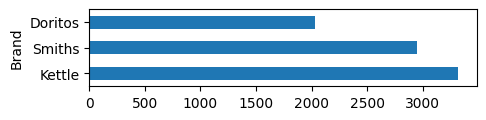

========== OLDER FAMILIES - Mainstream ==========
Brand
Kettle     2019
Smiths     1742
Doritos    1263
Name: count, dtype: int64


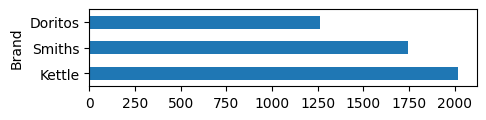

========== OLDER SINGLES/COUPLES - Premium ==========
Brand
Kettle     2947
Smiths     1952
Doritos    1784
Name: count, dtype: int64


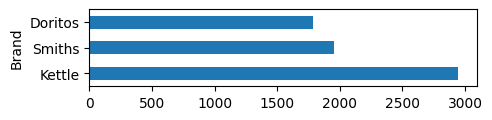

========== OLDER SINGLES/COUPLES - Budget ==========
Brand
Kettle      3065
Smiths      2010
Pringles    1843
Name: count, dtype: int64


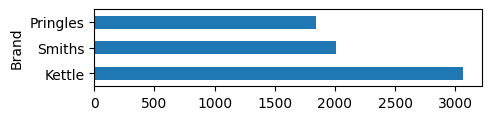

========== OLDER SINGLES/COUPLES - Mainstream ==========
Brand
Kettle     2835
Smiths     2070
Doritos    1791
Name: count, dtype: int64


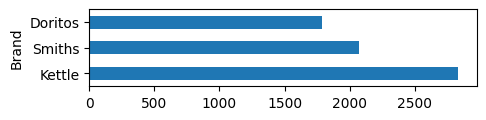

========== RETIREES - Premium ==========
Brand
Kettle      2216
Smiths      1395
Pringles    1331
Name: count, dtype: int64


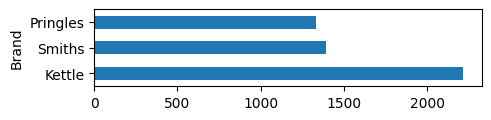

========== RETIREES - Budget ==========
Brand
Kettle     2592
Smiths     1612
Doritos    1592
Name: count, dtype: int64


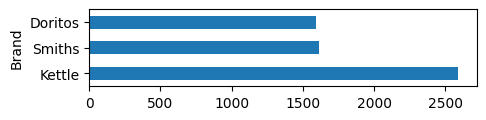

========== RETIREES - Mainstream ==========
Brand
Kettle      3386
Smiths      2367
Pringles    2103
Name: count, dtype: int64


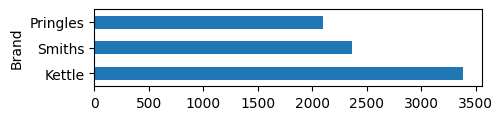

========== YOUNG FAMILIES - Premium ==========
Brand
Kettle      1745
Smiths      1384
Pringles    1007
Name: count, dtype: int64


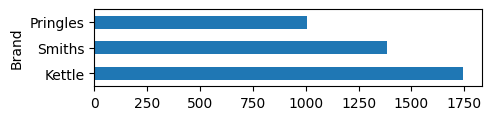

========== YOUNG FAMILIES - Budget ==========
Brand
Kettle     2743
Smiths     2334
Doritos    1767
Name: count, dtype: int64


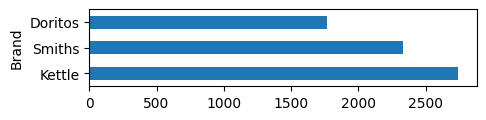

========== YOUNG FAMILIES - Mainstream ==========
Brand
Kettle      1789
Smiths      1681
Pringles    1148
Name: count, dtype: int64


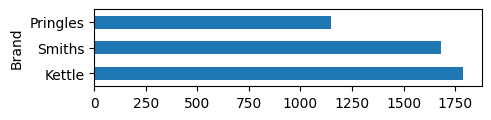

In [45]:
for stage in df["Group"].unique() :
    for subs in df["Subscription"].unique() :
        print("==========", stage, "-", subs, "==========")
        summary = df[(df["Group"] == stage) & (df["Subscription"] == subs)]["Brand"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize = (5, 1))
        plt.show()


EVERY SEGMENT HAD "Kettle" AS THE MOST PURCHASED BRAND. EVERY SEGMENT EXCEPT "YOUNG SINGLES/COUPLES Mainstream" HAD "Smiths" AS THEIR SECOND MOST PURCHASED BRAND. "YOUNG SINGLES/COUPLES Mainstream" HAD "Doritos" AS AS THEIR SECOND MOST PURCHASED BRAND.

EXAMINE IF OUR TARGET SEGMENT TENDS TO BUY LARGER PACKS OF CHIPS

In [46]:
# MERGE DF WITH PACK SIZE
merged_pack = pd.concat([df, pack_size.rename("Size")], axis=1)
merged_pack.head()

,Date,Store Id,Card No.,Transaction Id,Product Id,Product,Quantity,Sales,Group,Subscription,Brand,Size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150.0


========== YOUNG SINGLES/COUPLES - Premium ==========
Size
134.0     537
150.0     933
175.0    1618
Name: count, dtype: int64


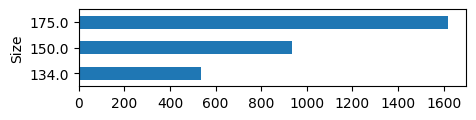

========== YOUNG SINGLES/COUPLES - Budget ==========
Size
134.0     832
150.0    1390
175.0    2338
Name: count, dtype: int64


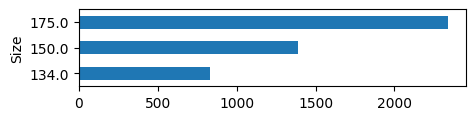

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Size
134.0    2315
150.0    3080
175.0    4997
Name: count, dtype: int64


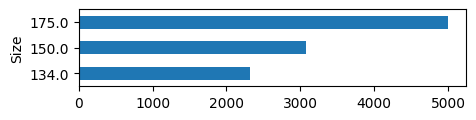

========== MIDAGE SINGLES/COUPLES - Premium ==========
Size
134.0     781
150.0    1207
175.0    2082
Name: count, dtype: int64


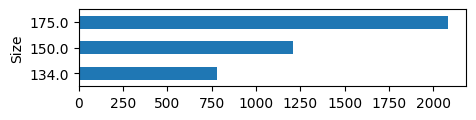

========== MIDAGE SINGLES/COUPLES - Budget ==========
Size
134.0     449
150.0     771
175.0    1277
Name: count, dtype: int64


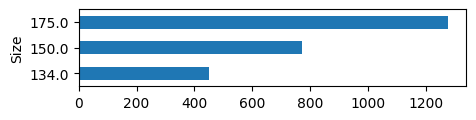

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Size
134.0    1159
150.0    1777
175.0    2975
Name: count, dtype: int64


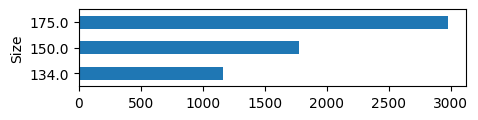

========== NEW FAMILIES - Premium ==========
Size
134.0    165
150.0    233
175.0    376
Name: count, dtype: int64


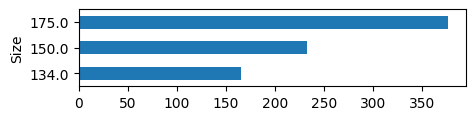

========== NEW FAMILIES - Budget ==========
Size
134.0    309
150.0    440
175.0    777
Name: count, dtype: int64


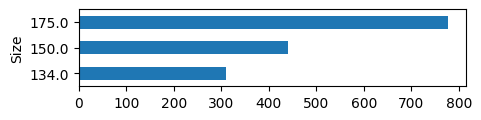

========== NEW FAMILIES - Mainstream ==========
Size
134.0    224
150.0    374
175.0    589
Name: count, dtype: int64


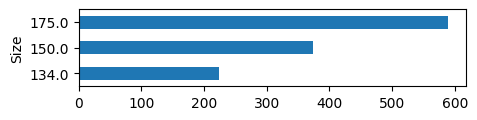

========== OLDER FAMILIES - Premium ==========
Size
134.0    1014
150.0    1673
175.0    2816
Name: count, dtype: int64


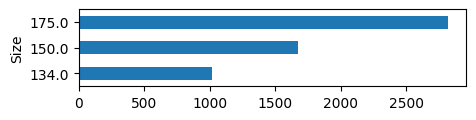

========== OLDER FAMILIES - Budget ==========
Size
134.0    1996
150.0    3588
175.0    5808
Name: count, dtype: int64


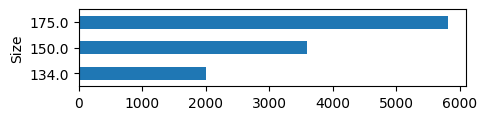

========== OLDER FAMILIES - Mainstream ==========
Size
134.0    1234
150.0    2189
175.0    3588
Name: count, dtype: int64


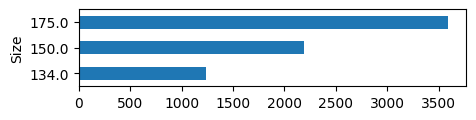

========== OLDER SINGLES/COUPLES - Premium ==========
Size
134.0    1744
150.0    2768
175.0    4458
Name: count, dtype: int64


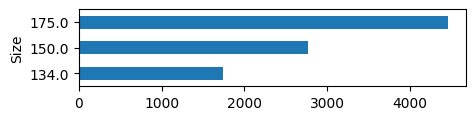

========== OLDER SINGLES/COUPLES - Budget ==========
Size
134.0    1843
150.0    2811
175.0    4625
Name: count, dtype: int64


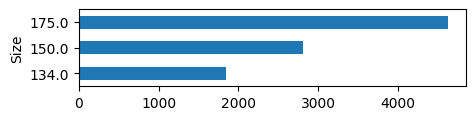

========== OLDER SINGLES/COUPLES - Mainstream ==========
Size
134.0    1720
150.0    2773
175.0    4525
Name: count, dtype: int64


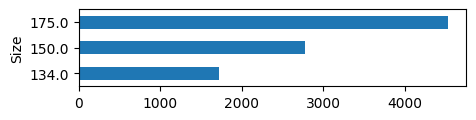

========== RETIREES - Premium ==========
Size
134.0    1331
150.0    1943
175.0    3306
Name: count, dtype: int64


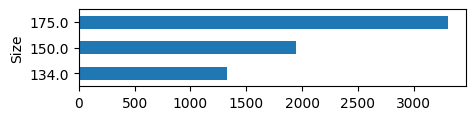

========== RETIREES - Budget ==========
Size
134.0    1517
150.0    2319
175.0    3847
Name: count, dtype: int64


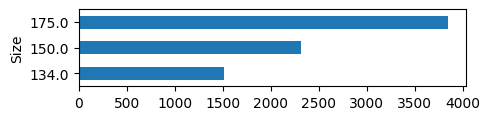

========== RETIREES - Mainstream ==========
Size
134.0    2103
150.0    3290
175.0    5295
Name: count, dtype: int64


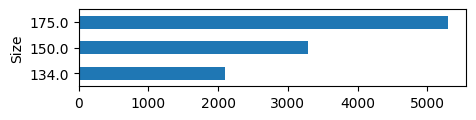

========== YOUNG FAMILIES - Premium ==========
Size
134.0    1007
150.0    1778
175.0    2998
Name: count, dtype: int64


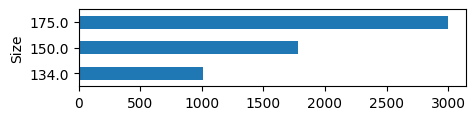

========== YOUNG FAMILIES - Budget ==========
Size
134.0    1674
150.0    2862
175.0    4921
Name: count, dtype: int64


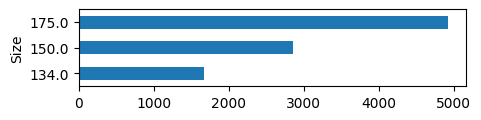

========== YOUNG FAMILIES - Mainstream ==========
Size
134.0    1148
150.0    2004
175.0    3174
Name: count, dtype: int64


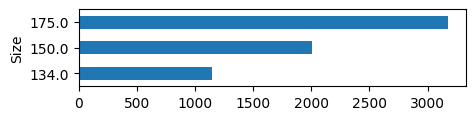

In [47]:
for stage in merged_pack["Group"].unique() :
    for subs in merged_pack["Subscription"].unique() :
        print("==========", stage, "-", subs, "==========")
        summary = merged_pack[(merged_pack["Group"] == stage) & (merged_pack["Subscription"] == subs)]["Size"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize = (5, 1))
        plt.show()

MOST FREQUENT CHIPS SIZE PURCHASED IS 175g FOLLOWED BY THE 150g CHIPS SIZE FOR ALL SEGMENTS.

AVERAGE AMOUNT OF CHIPS BOUGHT PER CUSTOMER SEGMENT

In [48]:
avg_chips = (df.groupby(["Group", "Subscription"])["Quantity"].sum() / df.groupby(["Group", "Subscription"])["Card No."].nunique()).sort_values(ascending=False).to_frame()
avg_chips

0
Group                  Subscription          
OLDER FAMILIES         Mainstream    9.255380
                       Budget        9.076773
                       Premium       9.071717
YOUNG FAMILIES         Budget        8.722995
                       Premium       8.716013
                       Mainstream    8.638361
OLDER SINGLES/COUPLES  Budget        6.781398
                       Premium       6.769543
                       Mainstream    6.712021
MIDAGE SINGLES/COUPLES Mainstream    6.432080
RETIREES               Budget        6.141847
                       Premium       6.103358
MIDAGE SINGLES/COUPLES Premium       6.078514
                       Budget        6.026459
RETIREES               Mainstream    5.925920
NEW FAMILIES           Mainstream    4.891566
                       Budget        4.821527
                       Premium       4.815652
YOUNG SINGLES/COUPLES  Mainstream    4.575597
                       Premium       4.264113
                       Budget        4.250069

HISTOGRAM OF AVERAGE AMOUNT OF CHIPS BOUGHT PER CUSTOMER SEGMENT

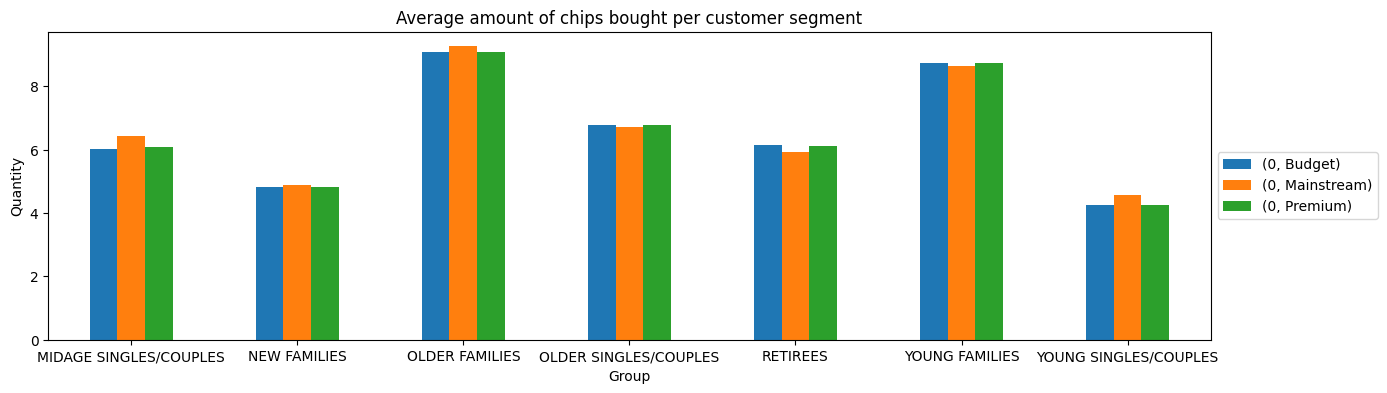

In [49]:
avg_chips.unstack().plot.bar(figsize = (15, 4), rot = 0)
plt.title("Average amount of chips bought per customer segment")
plt.legend(loc = "center left", bbox_to_anchor = (1.0, 0.5))
plt.ylabel("Quantity")
plt.show()

AVERAGE CHIPS PRICE PER TRANSACTION BY SEGMENTS

In [50]:
# Calculate "Unit Price" only where "Quantity" is non-zero and both columns are not null
df["Unit Price"] = df["Sales"] / df["Quantity"].replace(0, pd.NA)
# Group by "Group" and "Subscription" and calculate the mean of "Unit Price"
chips_segment = df.groupby(["Group", "Subscription"], dropna=False)["Unit Price"].mean().sort_values(ascending=False).to_frame()
# Display the resulting DataFrame
chips_segment

Unit Price
Group                  Subscription            
YOUNG SINGLES/COUPLES  Mainstream      4.065642
MIDAGE SINGLES/COUPLES Mainstream      3.994241
RETIREES               Budget          3.924404
                       Premium         3.920942
NEW FAMILIES           Budget          3.917688
                       Mainstream      3.916133
OLDER SINGLES/COUPLES  Premium         3.893182
                       Budget          3.882096
NEW FAMILIES           Premium         3.872110
RETIREES               Mainstream      3.844294
OLDER SINGLES/COUPLES  Mainstream      3.814665
MIDAGE SINGLES/COUPLES Premium         3.770698
YOUNG FAMILIES         Premium         3.762150
                       Budget          3.760737
OLDER FAMILIES         Budget          3.745340
MIDAGE SINGLES/COUPLES Budget          3.743328
OLDER FAMILIES         Mainstream      3.737077
YOUNG FAMILIES         Mainstream      3.724533
OLDER FAMILIES         Premium         3.717000
YOUNG SINGLES/COUPLES  Premium         3.665414
                       Budget          3.657366

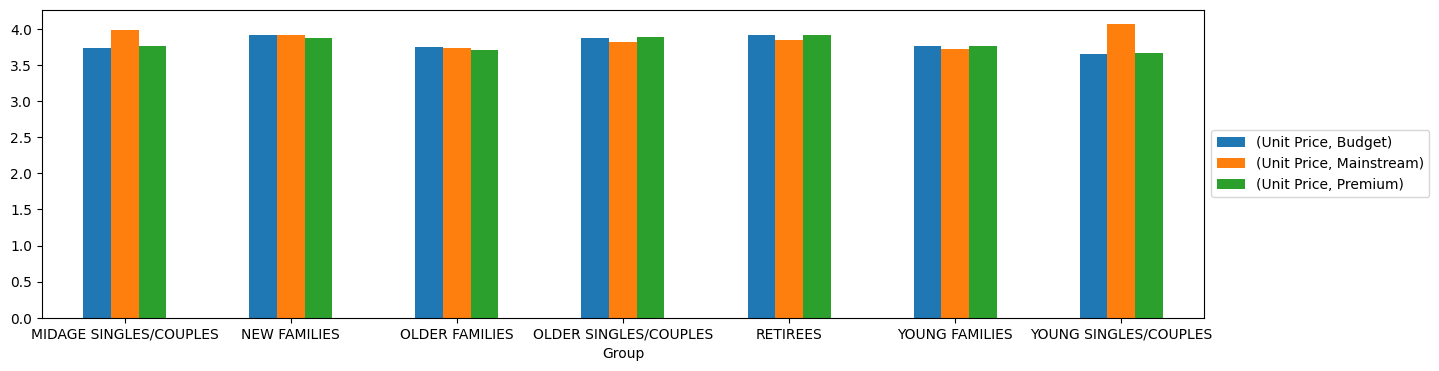

In [51]:
chips_segment.unstack().plot.bar(figsize = (15, 4), rot = 0)
plt.legend(loc = "center left", bbox_to_anchor = (1.0, 0.5))
plt.show()

RECOMMENDATIONS

1/ OLDER FAMILIES - Focus on the Budget Segment. - Strength: Frequent Purchase. We can give promotions that encourages more frequency of purchase. - Strength: High quantity of chips are purchased per visit. We can give promotions that encourage them to buy more quantity of chips per purchase.

2/ YOUNG SINGLES/COUPLES - Focus on the Mainstream Segment. - This segment is the only segment that had "Doritos" as their 2nd most purchased brand (after "Kettle"). To specifically target this segment it might be a good idea to collaborate with "Doritos" merchant to do some branding promotion catered to "YOUNG SINGLES/COUPLES Mainstream" segment. - Strength: Population quantity. We can spend more effort on making sure our promotions reach them, and it reaches them frequently.

3/ RETIREES - Focus on the Mainstream Segment. - Strength: Population quantity. Again, since their population quantity is the contributor to the high total sales, we should spend more effort on making sure our promotions reaches as many of them as possible and frequent.

4/ GENERAL - All segments has "Kettle" as the most frequently purchased brand, and 175g (regardless of brand) followed by 150g as the preferred chips size. - When promoting chips in general to all segments it is good to take advantage of these two points.